In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt

# Reading in tornado report dataset
1) Select midwest states
2) Groupby month to get a count of tornadoes per month

In [3]:
raw_tor = pd.read_csv('data/1950-2021_actual_tornadoes.csv')
raw_tor

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,3,OK,40,23,...,15.80,10,1,1,1,25,0,0,0,0
1,193,1950,10,9,1950-10-09,02:15:00,3,NC,37,9,...,2.00,880,1,1,1,47,0,0,0,0
2,195,1950,11,20,1950-11-20,02:20:00,3,KY,21,1,...,0.10,10,1,1,1,177,0,0,0,0
3,196,1950,11,20,1950-11-20,04:00:00,3,KY,21,2,...,0.10,10,1,1,1,209,0,0,0,0
4,197,1950,11,20,1950-11-20,07:30:00,3,MS,28,14,...,2.00,37,1,1,1,101,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67553,620523,2021,9,8,2021-09-08,15:32:00,3,PA,42,0,...,0.73,30,1,1,1,109,0,0,0,0
67554,620524,2021,9,8,2021-09-08,15:35:00,3,PA,42,0,...,1.45,30,1,1,1,109,0,0,0,0
67555,620525,2021,9,8,2021-09-08,19:08:00,3,FL,12,0,...,1.45,50,1,1,1,129,0,0,0,0
67556,620526,2021,9,9,2021-09-09,02:10:00,3,CT,9,0,...,0.75,75,1,1,1,13,0,0,0,0


In [25]:
states = ['IL','IN','WI','MI','MO','IA','MN']
df_ls = []
for n in range(len(states)):
    state_df = raw_tor.iloc[np.where(raw_tor['st']==states[n])[0]]
    state_df['ym'] = pd.to_datetime(state_df['date']).dt.to_period('M')
    df_ls.append(state_df)

/tmp/ipykernel_504335/3966599584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df['ym'] = pd.to_datetime(state_df['date']).dt.to_period('M')
/tmp/ipykernel_504335/3966599584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df['ym'] = pd.to_datetime(state_df['date']).dt.to_period('M')
/tmp/ipykernel_504335/3966599584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [29]:
mdw_torct = pd.DataFrame(pd.concat(df_ls).groupby('ym').count()['om']).rename(columns={'om':'Count'})
mdw_torct['Date'] = mdw_torct.index.to_timestamp()
mdw_torct = mdw_torct.set_index('Date')
mdw_torct

,Count
Date,
1950-01-01,4
1950-03-01,1
1950-05-01,2
1950-06-01,10
1950-07-01,6
...,...
2021-07-01,61
2021-08-01,63
2021-09-01,7


# Reading in climate indicies 
- ENSO, PDO, NAO, and AO
- Putting into a common dataframe

In [10]:
enso = pd.read_csv('https://www.atmos.illinois.edu/~snesbitt/soi.dat',sep=r'\s+',header=None,skiprows=4,skipfooter=0, engine='python')
pdo = pd.read_csv('https://www.ncei.noaa.gov/pub/data/cmb/ersst/v5/index/ersst.v5.pdo.dat',sep=r'\s+',header=None,skiprows=2, engine='python')
nao = pd.read_csv('https://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii.table',sep=r'\s+',header=None,skiprows=1, engine='python')
ao = pd.read_csv('https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii.table',sep=r'\s+',header=None,skiprows=1, engine='python')

In [13]:
enso_new=pd.DataFrame()
nao_new=pd.DataFrame()
pdo_new=pd.DataFrame()
ao_new=pd.DataFrame()

enso_new['Date'] = pd.date_range(start=dt.datetime(enso[0].iloc[0],1,1),end=dt.datetime(enso[0].iloc[-1],12,1),freq="MS")
nao_new['Date'] = pd.date_range(start=dt.datetime(nao[0].iloc[0],1,1),end=dt.datetime(nao[0].iloc[-1],12,1),freq="MS")
pdo_new['Date'] = pd.date_range(start=dt.datetime(pdo[0].iloc[0],1,1),end=dt.datetime(pdo[0].iloc[-1],12,1),freq="MS")
ao_new['Date'] = pd.date_range(start=dt.datetime(ao[0].iloc[0],1,1),end=dt.datetime(ao[0].iloc[-1],12,1),freq="MS")

enso_new = enso_new.set_index('Date')
nao_new = nao_new.set_index('Date')
pdo_new = pdo_new.set_index('Date')
ao_new = ao_new.set_index('Date')

enso_new['ENSO']=enso.loc[:,1:].stack(dropna=False).values
nao_new['NAO']=nao.loc[:,1:].stack(dropna=False).values
pdo_new['PDO']=pdo.loc[:,1:].stack(dropna=False).values
ao_new['AO']=ao.loc[:,1:].stack(dropna=False).values

/tmp/ipykernel_504335/2246988277.py:16: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  enso_new['ENSO']=enso.loc[:,1:].stack(dropna=False).values
/tmp/ipykernel_504335/2246988277.py:17: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  nao_new['NAO']=nao.loc[:,1:].stack(dropna=False).values
/tmp/ipykernel_504335/2246988277.py:18: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this wa

In [14]:
newdf_all = pd.merge(enso_new,pdo_new, left_index=True, right_index=True)
newdf_all.loc[newdf_all['ENSO'] <= -9.9,'ENSO'] = np.nan
newdf_all.loc[newdf_all['PDO'] > 90.,'PDO'] = np.nan

newdf_all = pd.merge(newdf_all,nao_new, left_index=True, right_index=True)
newdf_all.loc[newdf_all['NAO'] <= -99.9,'NAO'] = np.nan

newdf_all = pd.merge(newdf_all,ao_new, left_index=True, right_index=True)
newdf_all.loc[newdf_all['AO'] <= -99.9,'AO'] = np.nan
newdf_all

,ENSO,PDO,NAO,AO
Date,,,,
1951-01-01,1.5,-1.19,0.08,-0.085
1951-02-01,0.9,-1.52,0.70,-0.400
1951-03-01,-0.1,-1.72,-1.02,-1.934
1951-04-01,-0.3,-1.35,-0.22,-0.776
1951-05-01,-0.7,-1.29,-0.59,-0.863
...,...,...,...,...
2025-08-01,0.4,-3.20,0.26,0.036
2025-09-01,0.0,-2.33,-0.80,0.048
2025-10-01,NaN,-2.40,-0.96,0.064


# Merge climate indicies and tornado counts into one dataframe

In [148]:
clim_tor_df = pd.merge(newdf_all,mdw_torct, how='inner', left_index=True, right_index=True)
clim_tor_df

,ENSO,PDO,NAO,AO,Count
Date,,,,,
1951-03-01,-0.1,-1.72,-1.02,-1.934,1
1951-05-01,-0.7,-1.29,-0.59,-0.863,2
1951-06-01,0.2,-1.77,-1.64,-0.918,12
1951-07-01,-1.0,-0.23,1.37,0.090,8
1951-08-01,-0.2,-1.76,-0.22,-0.377,4
...,...,...,...,...,...
2021-07-01,1.4,-2.00,0.03,0.630,61
2021-08-01,0.6,-0.95,-0.28,-0.209,63
2021-09-01,0.8,-1.96,-0.21,-0.252,7


# Using a Random Forest Regression
- Features: 4 climate indicies
- Prediction: monthly tornado count

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

In [149]:
X = clim_tor_df.drop(columns=['Count']).copy()
y = clim_tor_df['Count'].copy()

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print('Train size:', X_train.shape, 'Test size:', X_test.shape)

Train size: (483, 4) Test size: (162, 4)


In [151]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

Text(0.5, 1.0, 'Random Forest Model Performance on Testing Dataset\nRMSE: 24.4584495738294\n CC:0.13106088300607868')

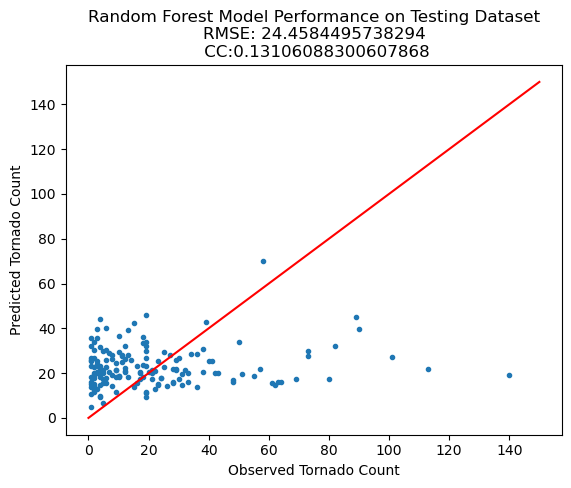

In [152]:
plt.scatter(y_test, y_pred, marker='.')
x_oto=np.linspace(0, 150)
y_oto=x_oto
plt.plot(x_oto,y_oto, 'red')
plt.xlabel('Observed Tornado Count')
plt.ylabel('Predicted Tornado Count')
plt.title('Random Forest Model Performance on Testing Dataset\n' \
'RMSE: '+str(root_mean_squared_error(y_test, y_pred))+'\n '
'CC:'+str(np.corrcoef(y_test,y_pred)[0,1]))

# One-hot encoding of month

In [154]:
clim_tor_df

,ENSO,PDO,NAO,AO,Count
Date,,,,,
1951-03-01,-0.1,-1.72,-1.02,-1.934,1
1951-05-01,-0.7,-1.29,-0.59,-0.863,2
1951-06-01,0.2,-1.77,-1.64,-0.918,12
1951-07-01,-1.0,-0.23,1.37,0.090,8
1951-08-01,-0.2,-1.76,-0.22,-0.377,4
...,...,...,...,...,...
2021-07-01,1.4,-2.00,0.03,0.630,61
2021-08-01,0.6,-0.95,-0.28,-0.209,63
2021-09-01,0.8,-1.96,-0.21,-0.252,7


In [155]:
import calendar

df_dict_ls = []
for n in range(clim_tor_df.shape[0]):
    dict_n = dict(enso = clim_tor_df['ENSO'].values[n],
                  pdo= clim_tor_df['PDO'].values[n],
                  nao= clim_tor_df['NAO'].values[n],
                  ao= clim_tor_df['AO'].values[n],
                  month = calendar.month_name[clim_tor_df.index[n].month])
    df_dict_ls.append(dict_n)

In [156]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False, dtype=int)
one_hot_data = vec.fit_transform(df_dict_ls)
one_hot_data

array([[-1,  0,  0, ...,  0, -1, -1],
       [ 0,  0,  0, ...,  0,  0, -1],
       [ 0,  0,  0, ...,  0, -1, -1],
       ...,
       [ 0,  0,  0, ...,  1,  0, -1],
       [ 0,  0,  0, ...,  0, -2, -3],
       [ 0,  1,  0, ...,  0,  0, -2]], shape=(645, 16))

In [157]:
vec.get_feature_names_out()

array(['ao', 'enso', 'month=April', 'month=August', 'month=December',
       'month=February', 'month=January', 'month=July', 'month=June',
       'month=March', 'month=May', 'month=November', 'month=October',
       'month=September', 'nao', 'pdo'], dtype=object)

In [175]:
onhot_pd = pd.DataFrame(one_hot_data, columns = vec.get_feature_names_out())
onhot_pd

,ao,enso,month=April,month=August,month=December,month=February,month=January,month=July,month=June,month=March,month=May,month=November,month=October,month=September,nao,pdo
0,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,-1,-1
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-1
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-1,-1
3,0,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,-2
641,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
642,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1
643,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-2,-3


In [176]:
X_train, X_test, y_train, y_test = train_test_split(onhot_pd, y, test_size=0.25, random_state=42)
print('Train size:', X_train.shape, 'Test size:', X_test.shape)

Train size: (483, 16) Test size: (162, 16)


In [177]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

Text(0.5, 1.0, 'Random Forest Model Performance on Testing Dataset\nRMSE: 24.192380785888382\n CC:0.38232371678587246')

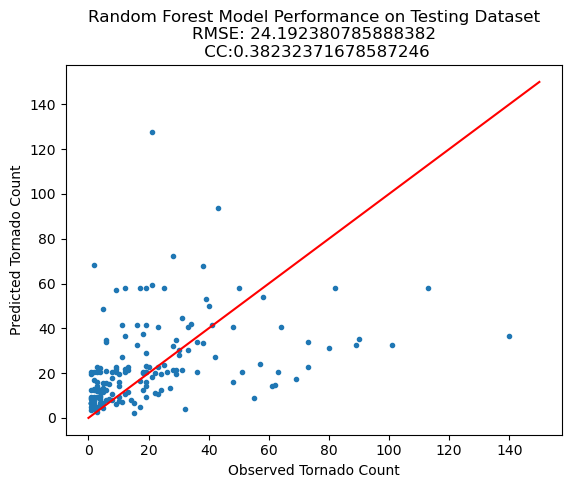

In [178]:
plt.scatter(y_test, y_pred, marker='.')
x_oto=np.linspace(0, 150)
y_oto=x_oto
plt.plot(x_oto,y_oto, 'red')
plt.xlabel('Observed Tornado Count')
plt.ylabel('Predicted Tornado Count')
plt.title('Random Forest Model Performance on Testing Dataset\n' \
'RMSE: '+str(root_mean_squared_error(y_test, y_pred))+'\n '
'CC:'+str(np.corrcoef(y_test,y_pred)[0,1]))

# Feature importance and multipass permutation

In [179]:
# feature_importance_ : 
    #  computed as the mean and standard deviation of accumulation of impurity decrease within each tree
# impurity: degree of mixed classes within a node of a decision tree is reduced by splitting the data
    # ("impure": if it contains a mix of different classes)
# - more important features... more it decreases the impurity on average across all trees
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

Text(0.5, 1.0, 'Feature Importances')

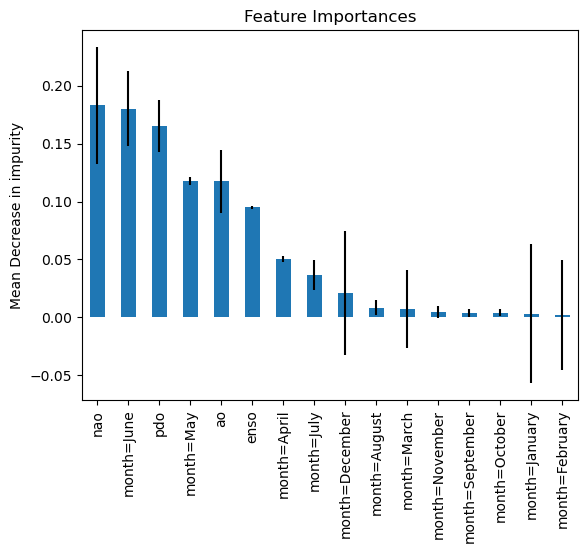

In [180]:
forest_importances = pd.Series(importances, index= vec.get_feature_names_out()).sort_values(ascending=False)
forest_importances.plot.bar(yerr=std)
plt.ylabel('Mean Decrease in impurity')
plt.title('Feature Importances')

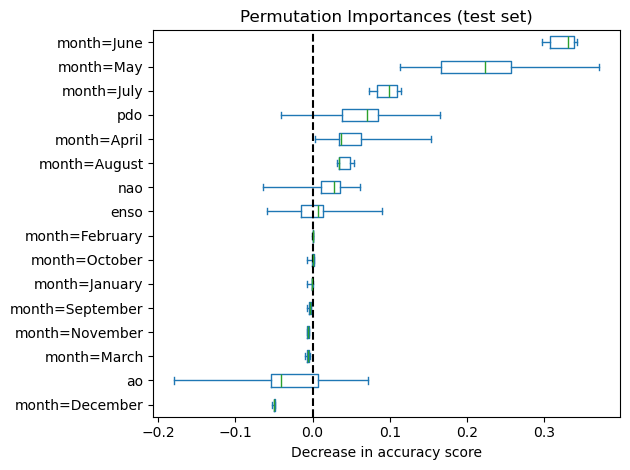

In [187]:
from sklearn.inspection import permutation_importance

result = permutation_importance(forest, X_test, y_test)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(result.importances[sorted_importances_idx].T,columns=X_test.columns[sorted_importances_idx],)

ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

# SHAP

In [188]:
import shap

In [190]:
explainer = shap.Explainer(forest, X_train, feature_names=X_train.columns)
shap_values = explainer(X_test)
shap_values

.values =
array([[  0.01579894,   0.37382978,  -0.24593778, ...,  -0.2081629 ,
          8.27833495,   0.3786215 ],
       [ -0.36708302,  -0.85639581,  -1.48217569, ...,  -0.36365191,
          0.37802516,  -0.75230603],
       [ -0.38471353,   1.05221571,  -0.86499086, ...,  -0.21708869,
          0.54972959,   1.04263556],
       ...,
       [ -3.79189623, -12.62358297,  -1.11021297, ...,  -0.24216089,
          0.36349381,   0.64261423],
       [ -0.11210954,  -0.12376042,  -0.8134495 , ...,  -0.16525052,
         -1.37897958,  -0.26746457],
       [ -3.01045625,  -0.34494153,  -1.56384052, ...,  -0.23887906,
          0.8502008 ,  -2.08728942]], shape=(162, 16))

.base_values =
array([19.97453587, 19.97453587, 19.97453587, 19.97453587, 19.97453587,
       19.97453587, 19.97453587, 19.97453587, 19.97453587, 19.97453587,
       19.97453587, 19.97453587, 19.97453587, 19.97453587, 19.97453587,
       19.97453587, 19.97453587, 19.97453587, 19.97453587, 19.97453587,
       19.97453587, 

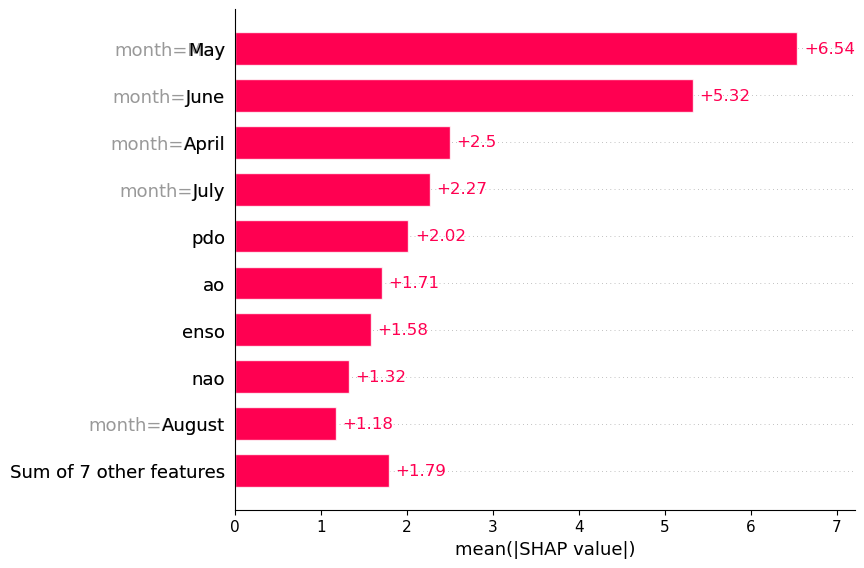

In [200]:
# Feature importance
shap.plots.bar(shap_values)

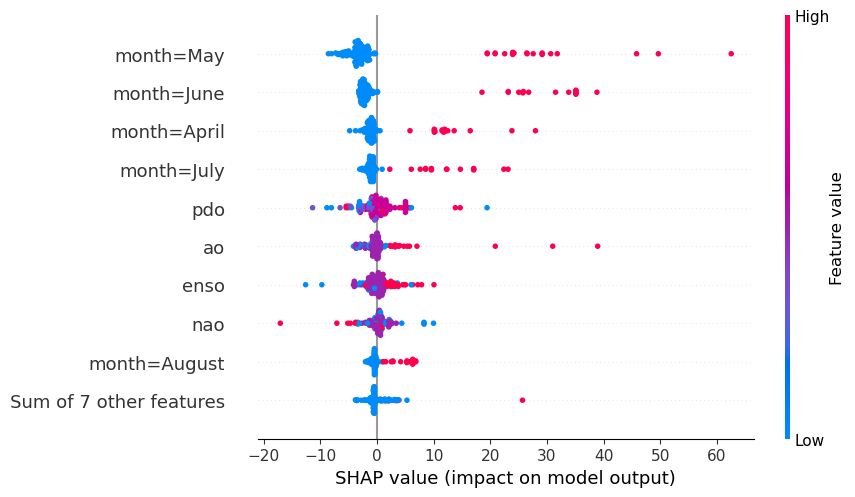

In [197]:
# Feature importance
shap.plots.beeswarm(shap_values)

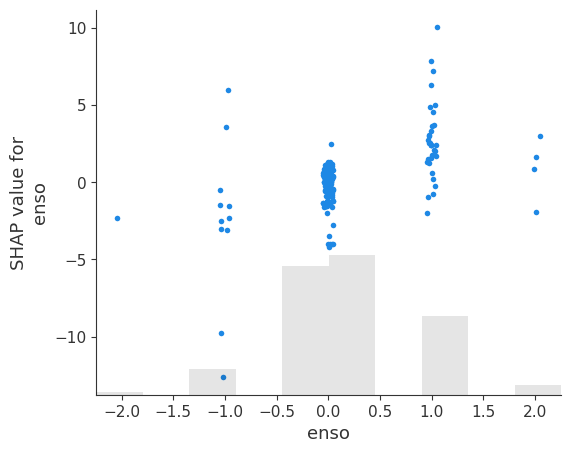

In [199]:
shap.plots.scatter(shap_values[:, 'enso'])

# Interpretation:
When analyzing feature importance using impurity based calculations the NAO appears to have the largest impact on predictions followed by June, PDO, May, and AO. However, when feature importance is calculated using a permutation test, the months June, May, and July appear to have the largest importance. In fact, PDO is 4th, NAO is 7th, and AO is last. This could be because the impurity test is biased toward high cardinality (large variability) in the training dataset. Since NAO, PDO, and AO can have a range of values while the months have their specific number, the impurity test likely biased the NAO, PDO, and AO's high cardinality. Therefore, it is more likely that the months of June, July, and May have a larger influence on the Random Forest prediction as indicated by the permutation test.

Simularly, when the Shapley values are calculated, the spring months have a higher importance than the PDO, AO, ENSO, and NAO. But now, the month of most importance is May (compared to June in the permutation test) followed by June, April, and July. Since the spring months have such a large effect on the Random Forest model, it explains why the model performance improved when those variables were included. It also makes physical sense since tornadoes are most common during the spring months.

Finally, when looking into the specific effect of ENSO on the models predictions, there is a slight trend in SHAP values where they are negative for negative ENSO and possitive for possitive ENSO. In addition, the SHAP value magtiude is greatest for posstive ENSO. This could indicate that negative ENSO leads to decreased tornadoes and positive ENSO leads to more tornadoes, however this realationship tends to be weak compared to the month. 